# Homework Assignment 8

In [3]:
import spacy
import operator
from geopy.geocoders import Nominatim
import turicreate as tc
from functools import lru_cache
from scipy.interpolate import interp1d
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import plotly_express as px
import pycountry
import pandas as pd

**Question 1:** Select a book or a movie's subtitle, and find the locations that appear in the book/movie. Then, draw these locations on a map (at least 10 locations) (30pt). Connect the discovered locations with lines according to their order of appearance
in the book. For example, if location B appeared immediately after location A, then draw a line connecting locations A and B (20pt).

I chose the book **Seeing Europe with Famous Authors** from the site http://www.gutenberg.org/

In [9]:
nlp = spacy.load('en_core_web_lg')

def get_locations_from_text(text): # changed the function from lecture so it will return also the order of the locations in the book
    locations_dict= {}

    #using spaCy to get entities
    doc = nlp(text)
    
    ordered_locations= [] 
    
    for entity in doc.ents:
        label = entity.label_
        if label not in {'LOC', 'GPE'}:
            continue
        loc = entity.text.lower().strip()
        if len(loc) < 2:
            continue
        if loc not in locations_dict:
            locations_dict[loc] = 0
        locations_dict[loc] += 1
        
        ordered_locations.append(loc)
        
    return locations_dict, ordered_locations

europe_authors_path = "Seeing_Europe_with_Famous_Authors.txt"
txt = open(europe_authors_path).read()
locations_dict, ordered_locations = get_locations_from_text(txt)
locations_dict = {k:v for k,v in  locations_dict.items() if v>3}
print(ordered_locations[:10])

['europe', 'europe', 'italy', 'sicily', 'greece', 'italy', 'sicily', 'greece', 'new york', 'london']


In [10]:
geolocator = Nominatim(user_agent="Data Science Education App")
@lru_cache(maxsize=256)
def get_location(loc):
    return geolocator.geocode(loc)

Number of european locations: 20


(36.5, 55)

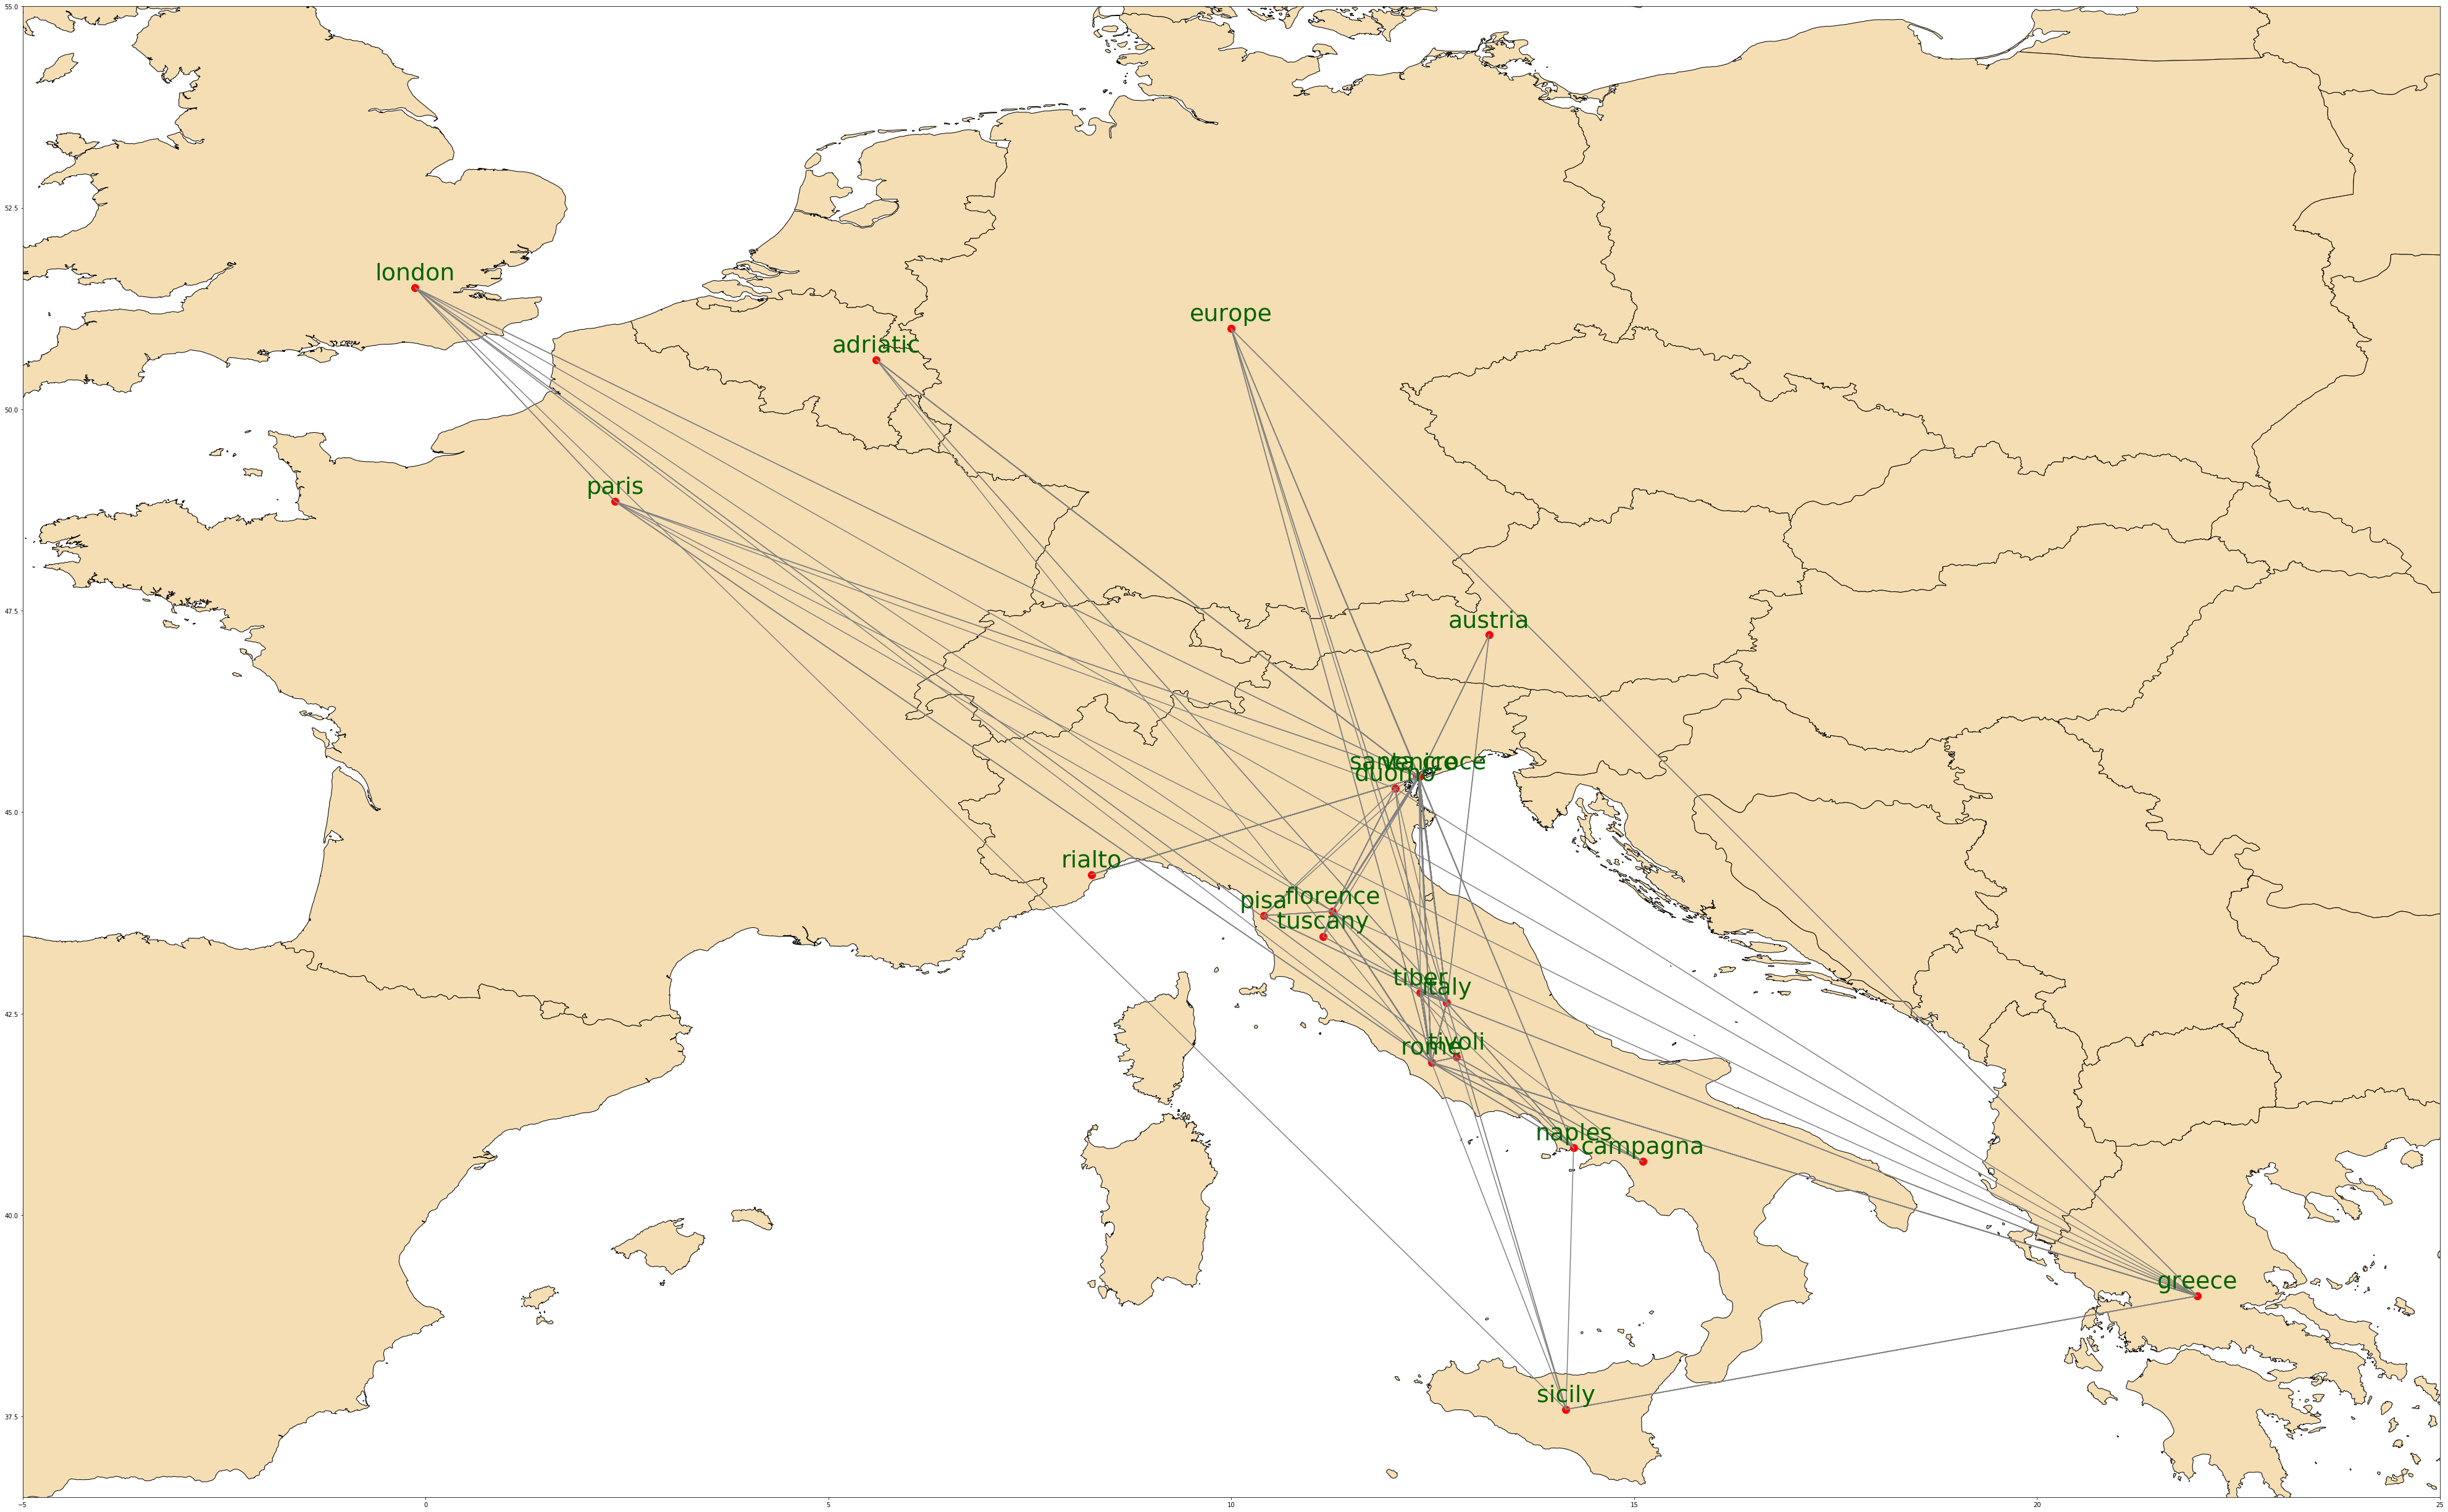

In [11]:
# Europe borders Shapefile
fp = "Europe_borders/Europe_borders.shp"
data = gpd.read_file(fp)
data.plot(color='wheat', edgecolor='black',figsize=(55,55));

legal_locations = []
plt.tight_layout()
cnt = 0
for loc, v in locations_dict.items():
    location = get_location(loc)
    if not (-5 < location.longitude < 25) or not (55>location.latitude  > 36.5):  # Only locations in europe
        continue
    cnt += 1
    legal_locations.append(loc)
    plt.plot(location.longitude,location.latitude, marker='o', color='red', markersize=12)
    plt.annotate(s=loc, xy=(location.longitude, location.latitude+0.1),
                 horizontalalignment='center', fontsize=38, color="darkgreen")


ordered_locations = [x for x in ordered_locations if x in legal_locations]
loc_links = []
for first, second in zip(ordered_locations, ordered_locations[1:]):
    if not first == second:
        loc_links.append((first, second))
        frst = get_location(first)
        sec = get_location(second)
        plt.plot([frst.longitude, sec.longitude], [frst.latitude, sec.latitude], color='grey')
        

print(f"Number of european locations: {cnt}")

axes = plt.gca()
axes.set_xlim([-5, 25])
axes.set_ylim([36.5, 55])

**Question 2:** Select a country's' statistic from the [Countries of the World dataset](https://www.kaggle.com/fernandol/countries-of-the-world).
Then, create a choropleth map displaying how the selected statistics changed over time (15pt) 
    
**Bonus:** Create a short animation that displays how the chosen statistics changed over time (10pt)

I chose to plot the change in **GDP per Capita** worlwide.

In [2]:
country_area = pd.read_csv('countries of the world.csv')
gp = px.data.gapminder()
gp.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [3]:
px.choropleth(gp, locations='iso_alpha', color='gdpPercap', color_continuous_scale=px.colors.sequential.Viridis,
              hover_name='country', animation_frame='year', projection='natural earth', title='Countries GDP per capita')

**Question 3:** Select a request type from [San Francisco 311 dataset](https://www.kaggle.com/datasf/case-data-from-san-francisco-311).
Create an interactive map that somehow presents in which areas this request occurs the most (35pt).

I chose the **Pavement_Defect** request type. The visualization I chose is Heat Map.

In [212]:
sf_reports = tc.SFrame.read_csv('san_fransisco/Case_Data_from_San_Francisco_311__SF311.csv')
sf_reports

Finished parsing file /data/home/yuvalhef/test/san_fransisco/Case_Data_from_San_Francisco_311__SF311.csv

Parsing completed. Parsed 100 lines in 0.763447 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,int,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 189228 lines. Lines per second: 278598

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "Dear Eugene Lew:" as a integer
Parse failed at token ending at: 
	 Dear Eugene Lew:^
Successfully parsed 0 tokens:

Unable to interpret "Thank you for your June 2015 message regarding your business account." as a integer
Parse failed at token ending at: 
	 Thank you for your June 2015 message regarding your business account.^
Successfully parsed 0 tokens:

Unable to interpret "If you have filed and paid in full for your 2016 business registration renewal" as a integer
Parse failed at token ending at: 
	 If you have filed and paid in full for your 2016 business registration renewal,^ your certificate (good from July 1, 2015- June 30, 2016) will be mailed to you in July.
Successfully parsed 0 tokens:

Unable to interpret "Regards" as a integer
Parse failed at token ending at: 
	 Regards,^
Successfully parsed 0 tokens:

Unable to interpret "Treasurer/Tax Collector's Office" as a integer
Parse failed at token ending at: 
	 Treasurer/Tax Collector's Office^
Successfully parsed 0 tokens:

Unable to interpret "Taxpayer Assistance Unit" as a integer
Parse failed at token ending at: 
	 Taxpayer Assistance Unit^
Successfully parsed 0 tokens:

Unable to interpret "City Hall" as a integer
Parse failed at token ending at: 
	 City Hall,^ Room 140
Successfully parsed 0 tokens:

Successfully parsed 1 tokens: 
	0: 1

Unable to interpret "San Francisco" as a integer
Parse failed at token ending at: 
	 San Francisco,^ CA 94102
Successfully parsed 0 tokens:

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "DISPOSITION: CITED AT 1525HRS"" as a integer
Parse failed at token ending at: 
	 DISPOSITION: CITED AT 1525HRS",^SFMTA - Parking Enforcement - G,General Requests
Successfully parsed 0 tokens:

Unexpected characters after last column. "DPW Ops Queue"
Parse failed at token ending at: 
	:00 AM,Closed,Case Completed - resolved: done,DPW Ops Queue,^Graffiti Private Property,Not_Offensive Graffiti
Successfully parsed 16 tokens: 
	0: 311
	1: DPT SignSh ... ea 2 Queue
	2: Sign Repair
	3: Sign - Defaced
	4: Other - De ... pport - OK
	5: 9 BEMIS ST ...  CA, 94131
	6: 8
	7: 
	8: (37.738043 ... 428840796)
	9: Open311
	10: http://mob ... pg
4863129
	11: 6
	12: 07/02/2015 ... 1:00:00 AM
	13: 07/02/2015 ... 1:00:00 AM
	14: Closed
	15: Case Compl ... lved: done

Unable to interpret "REFER #4852896"" as a integer
Parse failed at token ending at: 
	 REFER #4852896",^SFMTA - Parking Enforcement - G,General Requests
Successfully parsed 0 tokens:

16595 lines failed to parse correctly

Finished parsing file /data/home/yuvalhef/test/san_fransisco/Case_Data_from_San_Francisco_311__SF311.csv

Parsing completed. Parsed 1161482 lines in 5.16523 secs.

Columns:
	CaseID	int
	Opened	str
	Closed	str
	Updated	str
	Status	str
	Status Notes	str
	Responsible Agency	str
	Category	str
	Request Type	str
	Request Details	str
	Address	str
	Supervisor District	int
	Neighborhood	str
	Point	str
	Source	str
	Media URL	str

Rows: 1161482

Data:
+--------+------------------------+------------------------+
| CaseID |         Opened         |         Closed         |
+--------+------------------------+------------------------+
| 322571 | 11/30/2008 11:53:00 PM | 12/01/2008 03:19:00 PM |
| 322568 | 11/30/2008 11:13:00 PM | 07/21/2009 04:24:00 PM |
| 322567 | 11/30/2008 11:07:00 PM | 12/27/2008 06:07:00 AM |
| 322566 | 11/30/2008 10:56:00 PM | 07/21/2009 04:24:00 PM |
| 322565 | 11/30/2008 10:46:00 PM | 12/13/2008 10:50:00 AM |
| 322564 | 11/30/2008 10:43:00 PM | 12/01/2008 04:07:00 PM |
| 322560 | 11/30/2008 10:24:00 PM | 07/21/2009 04:24:00 PM |
| 322559 | 11/30/2008 10:20:00 PM | 12/01/2008 06:07:00 AM |
| 322558 | 11/30/2008 10:04:00 PM | 11/30/2008 10:18:00 PM |
| 322556 | 11/30/2008 09:34:00 PM | 12/09/2008 08:07:00 AM |
+--------+------------------------+------------------------+
+------------------------+--------+--------------+
|        Updated         | Status | Status Notes |
+------------------------+--------+--------------+
| 12/01/2008 03:19:00 PM | Closed |              |
| 07/21/2009 04:24:00 PM | Closed |              |
| 12/27/2008 06:07:00 AM | Closed |              |
| 07/21/2009 04:24:00 PM | Closed |              |
| 12/13/2008 10:50:00 AM | Closed |              |
| 12/01/2008 04:07:00 PM | Closed |              |
| 07/21/2009 04:24:00 PM | Closed |              |
| 12/01/2008 06:07:00 AM | Closed |              |
| 11/30/2008 10:18:00 PM | Closed |              |
| 12/09/2008 08:07:00 AM | Closed |              |
+------------------------+--------+--------------+
+-------------------------------+------------------------------+
|       Responsible Agency      |           Category           |
+-------------------------------+------------------------------+
|    PUC - Electric/Power - G   |       General Requests       |
|         DPW Ops Queue         |       Illegal Postings       |
|         DPW Ops Queue         |       Illegal Postings       |
|         DPW Ops Queue         | Street and Sidewalk Cleaning |
| RPD Park Service Area GGP ... |    Rec and Park Requests     |
|         DPW Ops Queue         |   Graffiti Public Property   |
|         DPW Ops Queue         | Street and Sidewalk Cleaning |
|         DPW Ops Queue         | Street and Sidewalk Cleaning |
|   311 Service Request Queue   |     311 External Request     |
|         DPW Ops Queue         | Street and Sidewalk Cleaning |
+-------------------------------+------------------------------+
+-------------------------------+--------------------------------+
|          Request Type         |        Request Details         |
+-------------------------------+--------------------------------+
| puc - electric - request_f... | puc - electric - request_f...  |
| Illegal Postings - Posting... | Posting_Too_Large_in_Size ...  |
| Illegal Postings - Affixed... | Affixed_Improperly on Sidewalk |
|       Sidewalk_Cleaning       |            Garbage             |
| Park - Structural_Maintenance |             Other              |
| Offensive Graffiti on Publ... | Other_enter_additional_det...  |
|        Illegal_Dumping        |            Garbage             |
|        Illegal_Dumping        |            Mattress            |
|        Damaged_Property       |                                |
|       Sidewalk_Cleaning       |      Human_waste_or_urine      |
+-------------------------------+--------------------------------+
+-------------------------------+---------------------+-----------------------+
|            Address            | Supervisor District |      Neighborhood     |
+-------------------------------+---------------------+-----------------------+
| Intersection of 21ST ST an... |          9          |        

In [220]:
sf_reports = sf_reports[sf_reports['Request Type'] == 'Pavement_Defect']  

# I used only 500 observations so the map will be comprehensible:
data = [(float(r['Point'].split(",")[0][1:]),float(r['Point'].split(",")[1][1:-2])) for r in sf_reports[:500]]

m = folium.Map(location=[37.77, -122.43], zoom_start=12.8)

HeatMap(data, radius=20).add_to(m)
m